In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import kagglehub
import os
import shutil
import seaborn as sns

from sklearn.preprocessing import LabelEncoder #for one hot encoding

In [2]:
kagglehub.login()

In [4]:
# Download the latest version
path = kagglehub.dataset_download("mehmettahiraslan/customer-shopping-dataset")

# Define source and destination paths
source = "C:/Users/muham/.cache/kagglehub/datasets/mehmettahiraslan/customer-shopping-dataset/versions/2"
destination = "C:/Users/muham/Desktop/repo/ml_tutorial/fantastic-palm-tree/datasets/"

# Ensure the destination directory exists
os.makedirs(destination, exist_ok=True)

# Move the downloaded files to your specific folder
shutil.move(source, destination)

print(f"Dataset moved to {destination}")

Error: Destination path 'C:/Users/muham/Desktop/repo/ml_tutorial/fantastic-palm-tree/datasets/2' already exists

In [5]:
data = pd.read_csv('datasets/2/customer_shopping_data.csv')
data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


### Welcome to the Shopping World of Istanbul!

This dataset offers a glimpse into the vibrant shopping scene of Istanbul, compiled from 10 prominent shopping malls spanning the years 2021 to 2023. Designed to provide a rich perspective on shopping habits, it captures data from diverse age groups and genders. 

The dataset includes key attributes such as:
- **Invoice Numbers** and **Customer IDs** for transaction tracking,
- **Age** and **Gender** demographics,
- **Payment Methods** and **Product Categories** for analyzing purchasing preferences,
- **Quantity**, **Price**, and **Order Dates** for transactional details,
- **Shopping Mall Locations** to add a geographic dimension to the analysis.


### E.D.A
**Steps**
- Take a look at the shape, distribution, datatypes with df. 
- Find some general trends and interesting points of investigation.
- Visualise some of these general trends.

In [6]:
data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [7]:
data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


### Observations on the Dataset

A few things strike me about this dataset:

1. **Invoice Number and Customer Uniqueness**
   Both the `invoice_number` and `customer` fields contain unique values. This means they won't contribute to any meaningful correlations or insights, which is a bit disappointing. I was hoping to use these fields for customer segmentation and analyzing individual behaviors.

2. **Opportunities for Clustering**
   Despite the limitations of the unique fields, **k-means clustering** is still a viable option. We can segment customers based on attributes such as:
   - Age
   - Gender
   - Amount spent
   - Possibly location (e.g., city-wise analysis), as I suspect there may be notable differences in summary statistics across cities.

These insights guide the direction of the analysis and inform which columns are worth focusing on for further processing.

In [9]:
data['invoice_timestamp'] = pd.to_datetime(data['invoice_date'], format='%d/%m/%Y')

# Initialize LabelEncoder
gender_encoder = LabelEncoder()
category_encoder = LabelEncoder()
payment_encoder = LabelEncoder()
mall_encoder = LabelEncoder()


# Apply LabelEncoder to specific columns
data['gender_encoded'] = category_encoder.fit_transform(data['gender'])
data['Category_encoded'] = category_encoder.fit_transform(data['category'])
data['payment_encoded'] = payment_encoder.fit_transform(data['payment_method'])
data['mall_encoded'] = mall_encoder.fit_transform(data['shopping_mall'])

data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,invoice_timestamp,gender_encoded,Category_encoded,payment_encoded,mall_encoded
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,2022-08-05,0,1,1,4
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,2021-12-12,1,4,2,2
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,2021-11-09,1,1,0,6
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,2021-05-16,0,4,1,7
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,2021-10-24,0,0,0,4


In [10]:
female_data = data[data['gender'] == 'Female']
male_data = data[data['gender'] == 'Male']

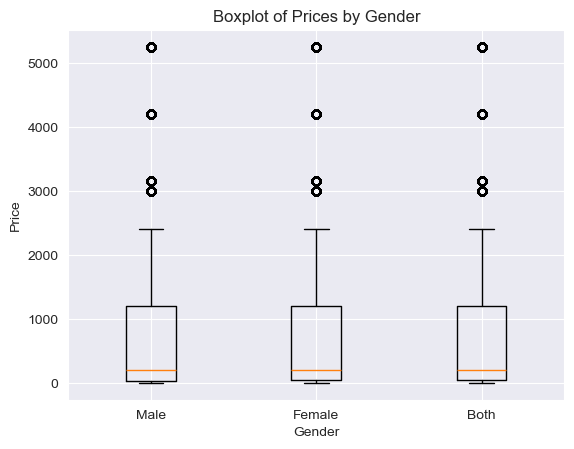

In [11]:
# Combine the two datasets into a list
boxplot_data = [male_data['price'], female_data['price'], data['price']]

# Create the boxplot
plt.boxplot(boxplot_data, tick_labels=['Male', 'Female', 'Both'])

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Price')
plt.title('Boxplot of Prices by Gender')

# Show the plot
plt.show()

In [12]:
print(male_data['price'].describe())
print(female_data['price'].describe())
print(data['price'].describe())

count    39975.000000
mean       690.920933
std        941.777893
min          5.230000
25%         40.660000
50%        203.300000
75%       1200.320000
max       5250.000000
Name: price, dtype: float64
count    59482.000000
mean       688.137615
std        940.791874
min          5.230000
25%         45.450000
50%        203.300000
75%       1200.320000
max       5250.000000
Name: price, dtype: float64
count    99457.000000
mean       689.256321
std        941.184567
min          5.230000
25%         45.450000
50%        203.300000
75%       1200.320000
max       5250.000000
Name: price, dtype: float64


In [13]:
male_data.describe()

,age,quantity,price,invoice_timestamp,gender_encoded,Category_encoded,payment_encoded,mall_encoded
count,39975.000000,39975.000000,39975.000000,39975,39975.0,39975.000000,39975.000000,39975.000000
mean,43.387767,3.003202,690.920933,2022-02-04 00:35:18.123827200,1.0,2.753896,0.754321,4.719124
min,18.000000,1.000000,5.230000,2021-01-01 00:00:00,1.0,0.000000,0.000000,0.000000
25%,30.000000,2.000000,40.660000,2021-07-20 00:00:00,1.0,1.000000,0.000000,4.000000
50%,43.000000,3.000000,203.300000,2022-02-05 00:00:00,1.0,2.000000,1.000000,5.000000
75%,56.000000,4.000000,1200.320000,2022-08-21 00:00:00,1.0,4.000000,1.000000,6.000000
max,69.000000,5.000000,5250.000000,2023-03-08 00:00:00,1.0,7.000000,2.000000,9.000000
std,15.026664,1.415129,941.777893,NaN,0.0,2.073008,0.769051,2.203466


### Observation

All three datasets (`male_data['price']`, `female_data['price']`, and `data['price']`) appear to have very similar distributions. This suggests that analyzing price by gender is unlikely to yield significant or meaningful insights.


In [14]:
unique_categories = pd.unique(data['category'])

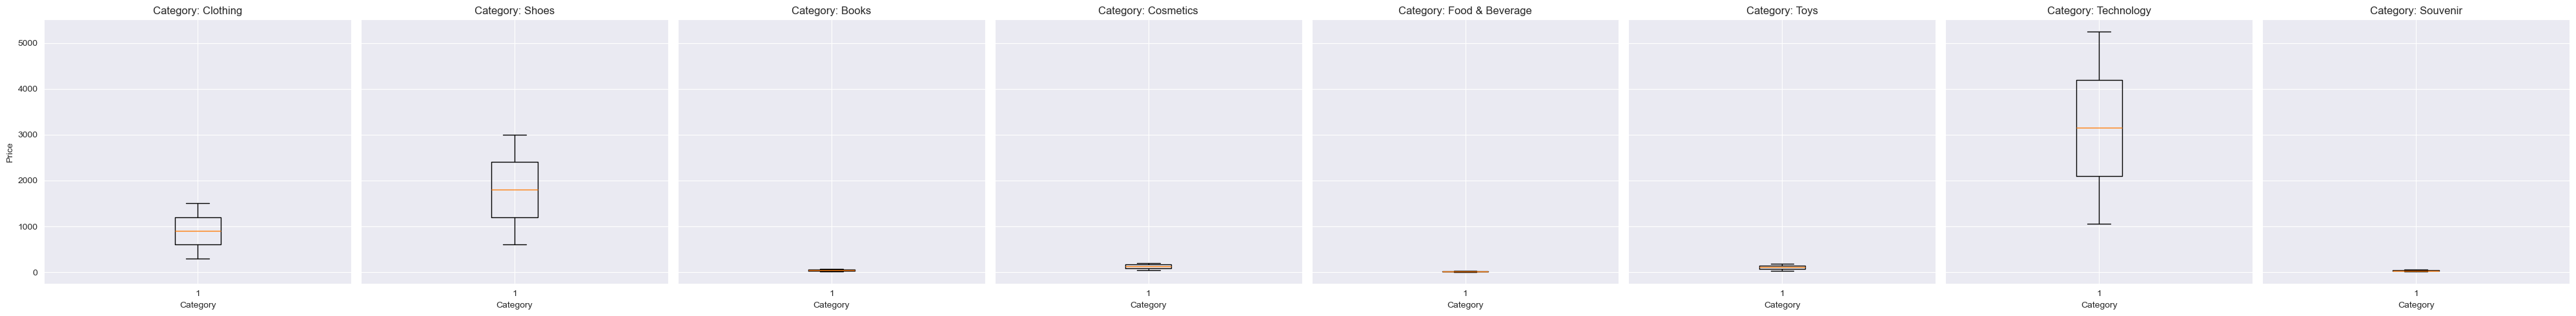

In [22]:
# Determine the number of unique categories
num_categories = len(unique_categories)

# Create a figure and axes for subplots
fig, axes = plt.subplots(1, num_categories, figsize=(5 * num_categories, 5), sharey=True)

# Iterate through each unique category and its corresponding axis
for i, category in enumerate(unique_categories):
    # Create the boxplot for the specific category
    axes[i].boxplot(data[data['category'] == category]['price'])
    axes[i].set_title(f'Category: {category}')
    axes[i].set_xlabel('Category')
    if i == 0:  # Add y-axis label to the first subplot
        axes[i].set_ylabel('Price')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plot
plt.show()

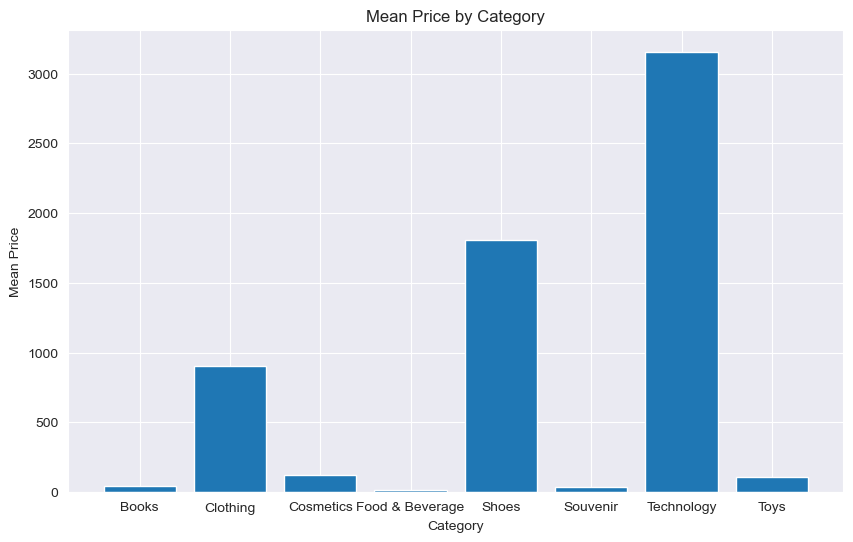

In [24]:
# Calculate the mean price for each category
category_means = data.groupby('category')['price'].mean()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(category_means.index, category_means.values)

# Add titles and labels
plt.title('Mean Price by Category')
plt.xlabel('Category')
plt.ylabel('Mean Price')

# Show the plot
plt.show()

## Findings
1. **Shoes and Clothing:**
   - The average price for shoes and clothing is unexpectedly high.
   - This could indicate a strong preference among Turkish consumers for designer or high-quality brands.

2. **Technology:**
   - Technology products surpass the mean average price bracket, a trend that aligns with global norms.
   - The higher price point is expected, given the premium nature of electronic goods.

3. **Cultural and Economic Factors:**
   - A penchant for branded goods may reflect cultural preferences or economic status in urban areas.
   - Technology's dominance in the price bracket highlights its essential and premium nature.

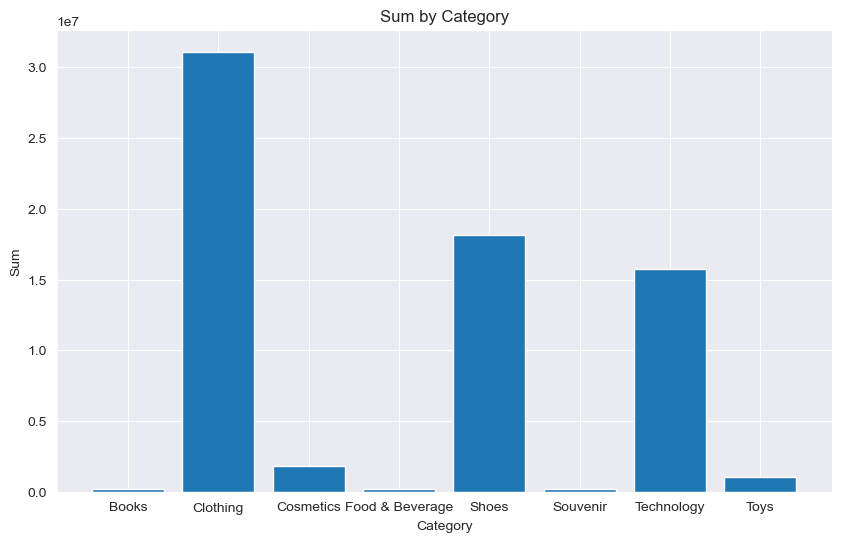

In [26]:
# Calculate the mean price for each category
category_means = data.groupby('category')['price'].sum()
# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(category_means.index, category_means.values)

# Add titles and labels
plt.title('Sum by Category')
plt.xlabel('Category')
plt.ylabel('Sum')

# Show the plot
plt.show()

## Findings
1. **Clothing Dominates:**
   - Clothing is the most commonly bought item, far surpassing all other categories.
   - Shoes and technology also rank highly but still fall short of clothing's dominance.

2. **Low Popularity Categories:**
   - Souvenirs, books, and food represent a small fraction of purchases compared to clothing.
   - Cosmetics and toys are similarly low in popularity, indicating niche or specialized markets.

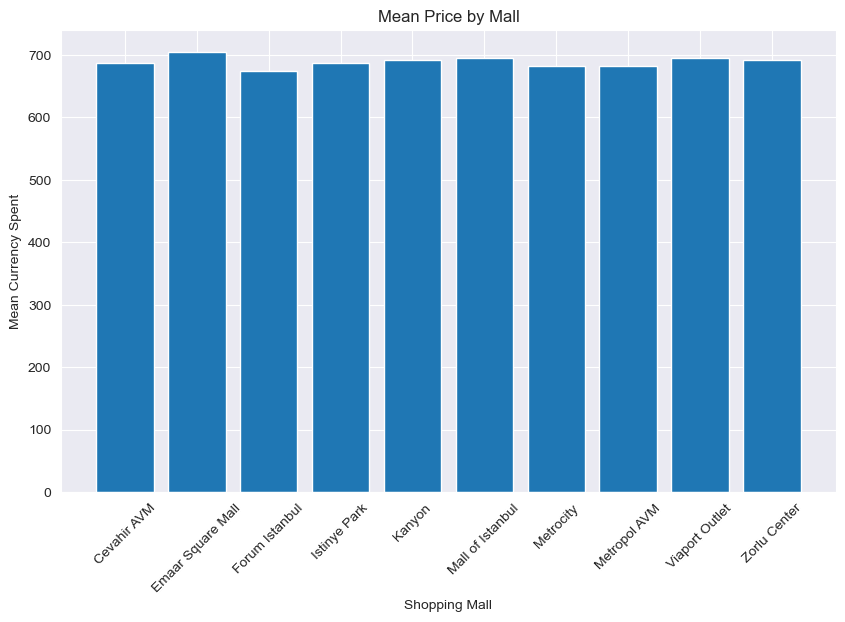

In [33]:
# Calculate the mean price for each category
category_means = data.groupby('shopping_mall')['price'].mean()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(category_means.index, category_means.values)

# Add titles and labels
plt.title('Mean Price by Mall')
plt.xlabel('Shopping Mall')
plt.ylabel('Mean Currency Spent')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

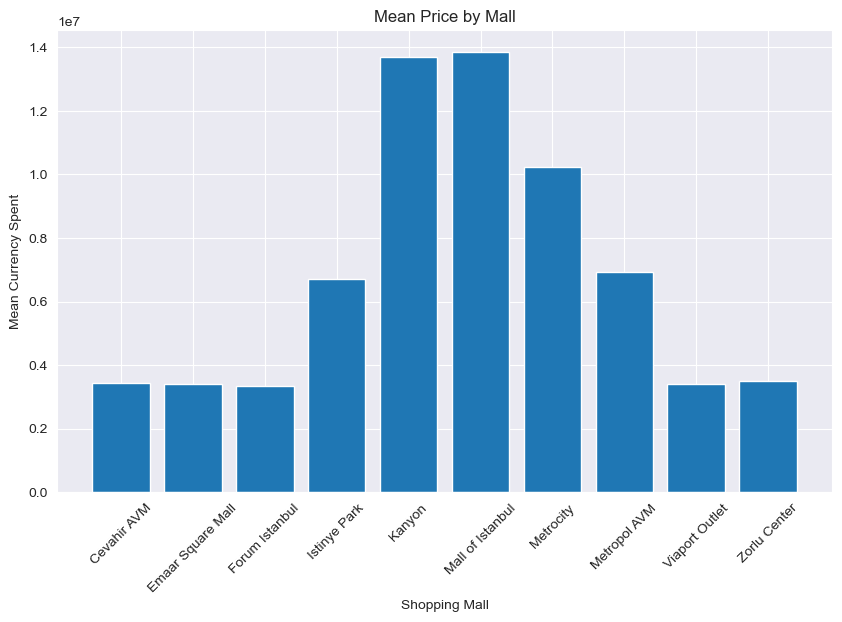

In [34]:
# Calculate the mean price for each category
category_means = data.groupby('shopping_mall')['price'].sum()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(category_means.index, category_means.values)

# Add titles and labels
plt.title('Total spent per mall')
plt.xlabel('Shopping Mall')
plt.ylabel('Total spent')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()## Findings

## Findings
1. **Mall of Istanbul:** 
   - The mall's name directly references the city, increasing its association with Istanbul's cultural identity.
   - Its wide variety of stores and entertainment options make it a frequent destination for both locals and tourists.

2. **Kanyon:**
   - Located in the business district of Istanbul, it serves as a hub for professionals and affluent shoppers.
   - Its unique architectural design and luxury offerings enhance its appeal to a niche audience.

3. **Geographical Insights:**
   - Both malls are situated in key urban locations, emphasizing their accessibility and strategic placement.

In [36]:
data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,invoice_timestamp,gender_encoded,Category_encoded,payment_encoded,mall_encoded
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,2022-08-05,0,1,1,4
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,2021-12-12,1,4,2,2
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,2021-11-09,1,1,0,6
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,2021-05-16,0,4,1,7
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,2021-10-24,0,0,0,4


### **Key Questions to Explore**

1. **Payment Methods:**
   - Does the payment method affect the price of items or the category of purchases?

2. **Gender and Categories:**
   - What categories are different genders more likely to buy?

3. **Gender Spending Patterns:**
   - Are there any differences between male and female spending patterns?
   - Which gender is more likely to use debit card/credit card?

4. **Spending Prediction:**
   - Can we predict how much a customer spent based on:
     - Category
     - Payment method
     - Gender
     - Age
     - Shopping mall?

5. **Age Distribution:**
   - Does age play a role in spending distribution and shopping location preferences?

6. **Spending by Age:**
   - What age groups are more likely to spend?

7. **Seasonal Trends:**
   - Does the season affect age distribution in spending?

In [39]:
plt.show()

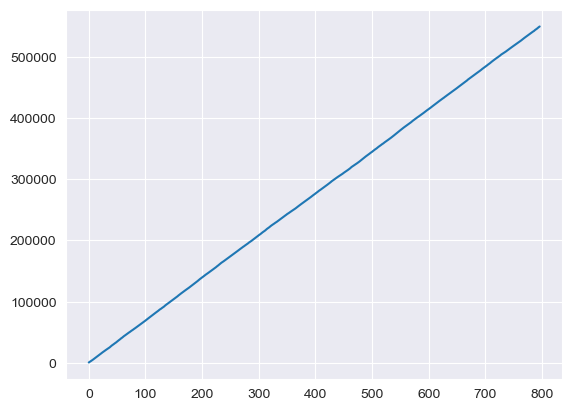

In [53]:
plt.plot(data.groupby('invoice_date')['price'].mean().cumsum().values)


plt.show()